<a href="https://colab.research.google.com/github/sumbal-ilyass/sumbal-ilyass-Telco-Customer-Churn-Prediction./blob/main/prediction_telcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####################### import libraries ###############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import joblib


In [ ]:
####################### Load dataset ####################
file_path = '/content/Telco-Customer-Churn-prediction dataset.csv'
df = pd.read_csv(file_path)

# Display first 5 rows
display(df.head(5))

# Display middle 5 rows (center)
center_index = len(df) // 2
display(df.iloc[center_index-2:center_index+3])

# Display last 5 rows
display(df.tail(5))


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3519,5019-GQVCR,Male,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.85,3645.6,No
3520,6036-TTFYU,Female,0,Yes,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.60,314.45,No
3521,2550-AEVRU,Female,0,Yes,Yes,57,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Electronic check,53.45,3053,No
3522,0969-RGKCU,Male,0,Yes,Yes,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,677.05,No
3523,0378-CJKPV,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),112.10,7965.95,No


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
################### Check for missing values ##################
print(df.isnull().sum())

# Option 1: Drop rows with missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with the mean (for numerical columns)
# df.fillna(df.mean(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
##################### Convert categorical columns using Label Encoding ########################
le = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])


In [ ]:
############################ Check for duplicate rows ##############################
print(f"Duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [ ]:
################### "Convert and Scale Numerical Columns" #######################
# Convert non-numeric columns to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Define numerical columns
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Fill missing numerical values with mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify the result
print(df[numerical_columns].head())


     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994971
1  0.066327       -0.259629     -0.173876
2 -1.236724       -0.362660     -0.960399
3  0.514251       -0.746535     -0.195400
4 -1.236724        0.197365     -0.941193


            gender  SeniorCitizen      Partner   Dependents        tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7.043000e+03   
mean      0.504756       0.162147     0.483033     0.299588 -2.421273e-17   
std       0.500013       0.368612     0.499748     0.458110  1.000071e+00   
min       0.000000       0.000000     0.000000     0.000000 -1.318165e+00   
25%       0.000000       0.000000     0.000000     0.000000 -9.516817e-01   
50%       1.000000       0.000000     0.000000     0.000000 -1.372744e-01   
75%       1.000000       0.000000     1.000000     1.000000  9.214551e-01   
max       1.000000       1.000000     1.000000     1.000000  1.613701e+00   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000   

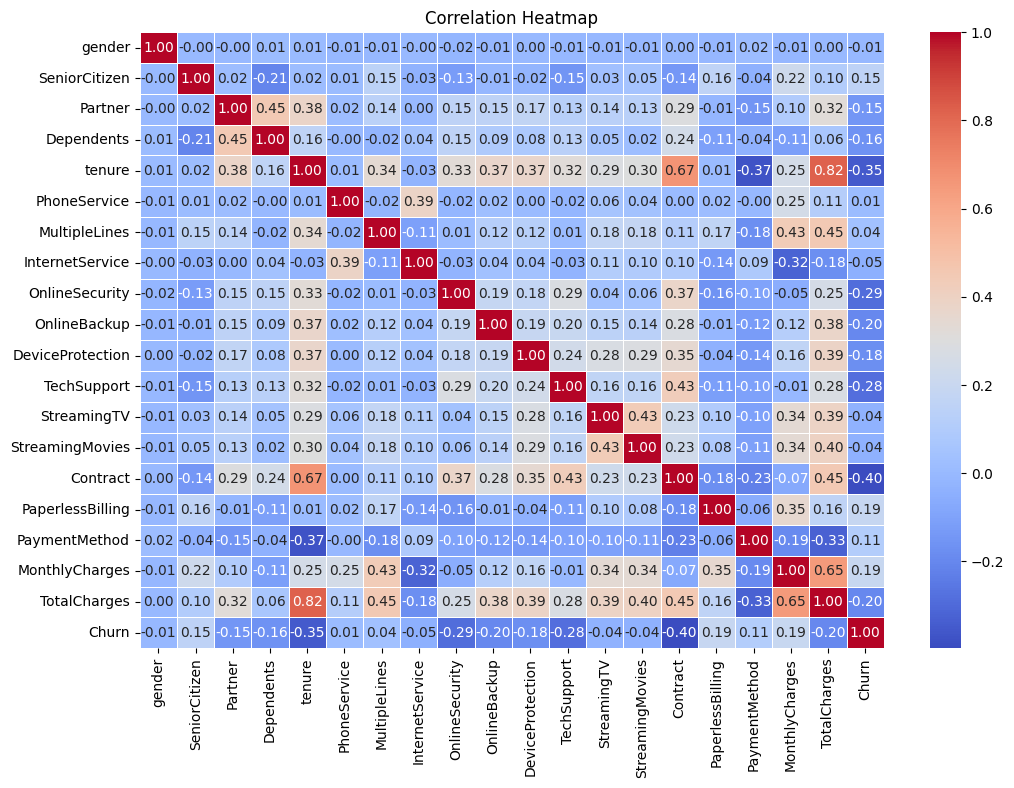

In [ ]:
############### Summary Statistics and Correlation Analysis ################
# Get summary statistics for numerical columns
print(df.describe())

# Correlation matrix
plt.figure(figsize=(12, 8))
# Calculate correlation for numerical features only
correlation_matrix = df.select_dtypes(include=np.number).corr()  # Include only numerical features
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

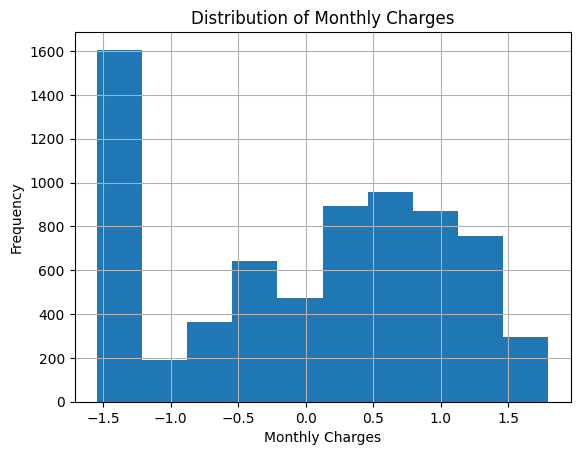

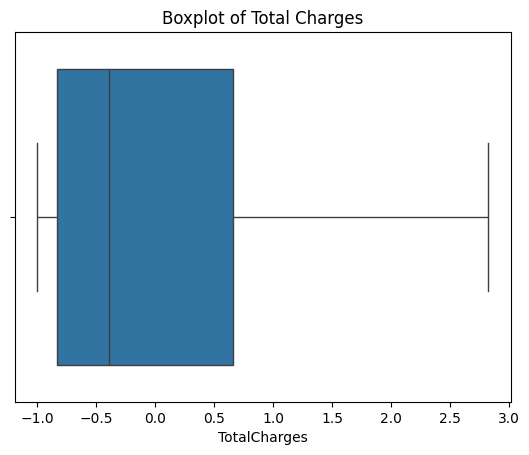

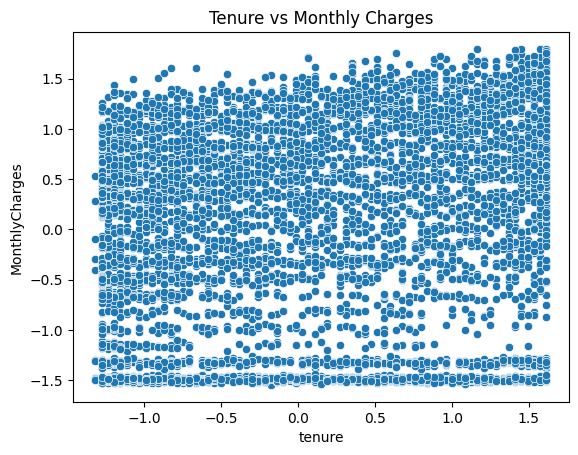

In [ ]:
########################## Exploratory Data Analysis (EDA) ############################
# Visualize the distribution of 'MonthlyCharges' using a histogram
df['MonthlyCharges'].hist()
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize outliers for 'TotalCharges'
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot of Total Charges')
plt.show()

# Scatter plot for 'tenure' vs 'MonthlyCharges'
sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'])
plt.title('Tenure vs Monthly Charges')
plt.show()


In [ ]:
#################### Data Splitting (Train-Test Split) #################
# Define features (X) and target (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Logistic Regression Performance:
Accuracy: 0.8176
Precision: 0.6824
Recall: 0.5818
F1 Score: 0.6281
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Decision Tree Performance:
Accuracy: 0.7303
Precision: 0.4910
Recall: 0.5121
F1 Score: 0.5013
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1036
           1       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409


Random Forest Performance:
Accuracy: 0.7928
Precision: 0.6484
Recall: 0.4745
F1 Score: 0.5480
              precision    recall  f1-score   support



<ipython-input-11-5447999cd2f6>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=model_performance_df, palette="viridis")


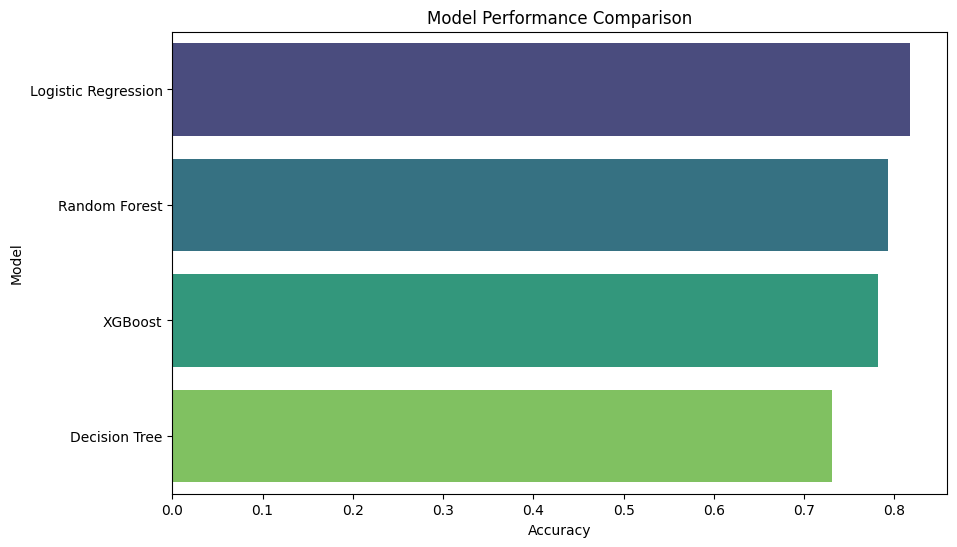

In [ ]:
############################## Initialize models #############################
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Initialize a dictionary to store results
model_performance = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Train models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    model_performance["Model"].append(model_name)
    model_performance["Accuracy"].append(accuracy)
    model_performance["Precision"].append(precision)
    model_performance["Recall"].append(recall)
    model_performance["F1 Score"].append(f1)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

# Create DataFrame for model comparison
model_performance_df = pd.DataFrame(model_performance)

# Sort by Accuracy and display
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Comparison:")
print(model_performance_df)

# Optional: Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=model_performance_df, palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


In [ ]:
########################### Save the best model (highest accuracy) ##########################
best_model = models[model_performance_df.iloc[0]['Model']]
joblib.dump(best_model, 'best_churn_model.pkl')
print(f"\n{best_model} saved as 'best_churn_model.pkl'")



LogisticRegression() saved as 'best_churn_model.pkl'


In [ ]:
################################ Simple CLI for User Input and Prediction ##################################
column_names = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

# Get user input for all features
customer_data = []

try:
    customer_data.append([
        int(input("Enter customer's gender (0 for Male, 1 for Female): ")),
        int(input("Is the customer a senior citizen? (1 for Yes, 0 for No): ")),
        int(input("Does the customer have a partner? (1 for Yes, 0 for No): ")),
        int(input("Does the customer have dependents? (1 for Yes, 0 for No): ")),
        int(input("Enter customer's tenure in months: ")),
        int(input("Does the customer have phone service? (1 for Yes, 0 for No): ")),
        int(input("Does the customer have multiple lines? (1 for Yes, 0 for No, 2 for No phone service): ")),
        int(input("Type of internet service (0 for DSL, 1 for Fiber optic, 2 for No): ")),
        int(input("Does the customer have online security? (1 for Yes, 0 for No, 2 for No internet service): ")),
        int(input("Does the customer have online backup? (1 for Yes, 0 for No, 2 for No internet service): ")),
        int(input("Does the customer have device protection? (1 for Yes, 0 for No, 2 for No internet service): ")),
        int(input("Does the customer have tech support? (1 for Yes, 0 for No, 2 for No internet service): ")),
        int(input("Does the customer have streaming TV? (1 for Yes, 0 for No, 2 for No internet service): ")),
        int(input("Does the customer have streaming movies? (1 for Yes, 0 for No, 2 for No internet service): ")),
        int(input("Customer's contract type (0 for Month-to-month, 1 for One year, 2 for Two year): ")),
        int(input("Is paperless billing enabled? (1 for Yes, 0 for No): ")),
        int(input("Payment method (0 for Electronic check, 1 for Mailed check, 2 for Bank transfer, 3 for Credit card): ")),
        float(input("Enter monthly charges: ")),
        float(input("Enter total charges: "))
    ])
except ValueError:
    print("Invalid input detected! Please enter the correct data type.")
    exit(1)

# Convert the user input into a DataFrame
customer_df = pd.DataFrame(customer_data, columns=column_names)

# Scale numerical data based on the previous scaler used
customer_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(customer_df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Load the saved model
loaded_model = joblib.load('best_churn_model.pkl')

# Make a prediction
prediction = loaded_model.predict(customer_df)

# Output the result
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is unlikely to churn.")


Enter customer's gender (0 for Male, 1 for Female): 1
Is the customer a senior citizen? (1 for Yes, 0 for No): 1
Does the customer have a partner? (1 for Yes, 0 for No): 0
Does the customer have dependents? (1 for Yes, 0 for No): 1
Enter customer's tenure in months: 34
Does the customer have phone service? (1 for Yes, 0 for No): 1
Does the customer have multiple lines? (1 for Yes, 0 for No, 2 for No phone service): 2
Type of internet service (0 for DSL, 1 for Fiber optic, 2 for No): 2
Does the customer have online security? (1 for Yes, 0 for No, 2 for No internet service): 1
Does the customer have online backup? (1 for Yes, 0 for No, 2 for No internet service): 2
Does the customer have device protection? (1 for Yes, 0 for No, 2 for No internet service): 0
Does the customer have tech support? (1 for Yes, 0 for No, 2 for No internet service): 1
Does the customer have streaming TV? (1 for Yes, 0 for No, 2 for No internet service): 1
Does the customer have streaming movies? (1 for Yes, 0 f